<a href="https://colab.research.google.com/github/jakubpiwowarski/Behavioral-Cloning/blob/master/Behavioral_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/jakubpiwowarski/Behavioral-Cloning


fatal: destination path 'Behavioral-Cloning' already exists and is not an empty directory.


In [2]:
! la Behavioral-Cloning

/bin/bash: line 1: la: command not found


In [3]:
! ls Behavioral-Cloning

driving_log.csv  IMG


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout, Conv2D
from keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
from sklearn.metrics import average_precision_score
import ntpath

In [5]:
datadir = 'Behavioral-Cloning'

In [6]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

<ipython-input-6-9844efea490a>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\center_2024_02_25_15_47_07_357.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\left_2024_02_25_15_47_07_357.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\right_2024_02_25_15_47_07_357.jpg,0.0,1.0,0.0,30.19029
1,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\center_2024_02_25_15_47_07_423.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\left_2024_02_25_15_47_07_423.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\right_2024_02_25_15_47_07_423.jpg,0.0,1.0,0.0,30.19032
2,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\center_2024_02_25_15_47_07_493.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\left_2024_02_25_15_47_07_493.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\right_2024_02_25_15_47_07_493.jpg,0.0,1.0,0.0,30.19027
3,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\center_2024_02_25_15_47_07_560.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\left_2024_02_25_15_47_07_560.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\right_2024_02_25_15_47_07_560.jpg,0.0,1.0,0.0,30.19032
4,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\center_2024_02_25_15_47_07_627.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\left_2024_02_25_15_47_07_627.jpg,C:\Users\jakub\OneDrive\Pulpit\Data\IMG\right_2024_02_25_15_47_07_627.jpg,0.0,1.0,0.0,30.19031


In [7]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2024_02_25_15_47_07_357.jpg,left_2024_02_25_15_47_07_357.jpg,right_2024_02_25_15_47_07_357.jpg,0.0,1.0,0.0,30.19029
1,center_2024_02_25_15_47_07_423.jpg,left_2024_02_25_15_47_07_423.jpg,right_2024_02_25_15_47_07_423.jpg,0.0,1.0,0.0,30.19032
2,center_2024_02_25_15_47_07_493.jpg,left_2024_02_25_15_47_07_493.jpg,right_2024_02_25_15_47_07_493.jpg,0.0,1.0,0.0,30.19027
3,center_2024_02_25_15_47_07_560.jpg,left_2024_02_25_15_47_07_560.jpg,right_2024_02_25_15_47_07_560.jpg,0.0,1.0,0.0,30.19032
4,center_2024_02_25_15_47_07_627.jpg,left_2024_02_25_15_47_07_627.jpg,right_2024_02_25_15_47_07_627.jpg,0.0,1.0,0.0,30.19031


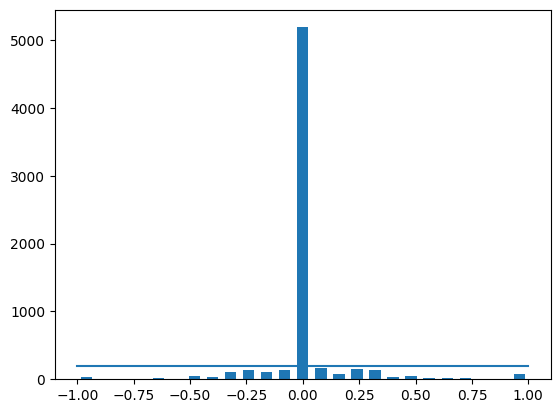

In [8]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 6592
removed: 4988
remaining: 1604


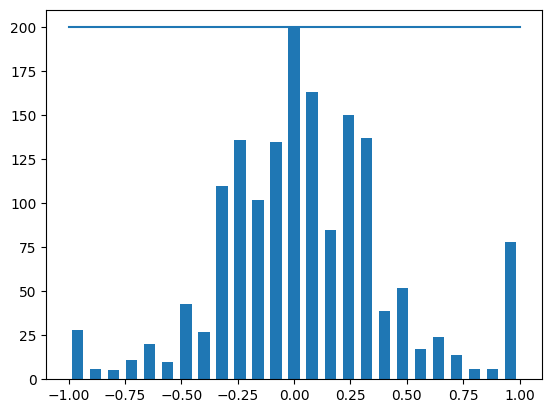

In [9]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))


In [10]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)


center      center_2024_02_25_15_47_08_572.jpg
left        left_2024_02_25_15_47_08_572.jpg  
right       right_2024_02_25_15_47_08_572.jpg 
steering   -0.05                              
throttle    1.0                               
reverse     0.0                               
speed       30.22263                          
Name: 18, dtype: object


In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 3849
Valid Samples: 963


Text(0.5, 1.0, 'Validation set')

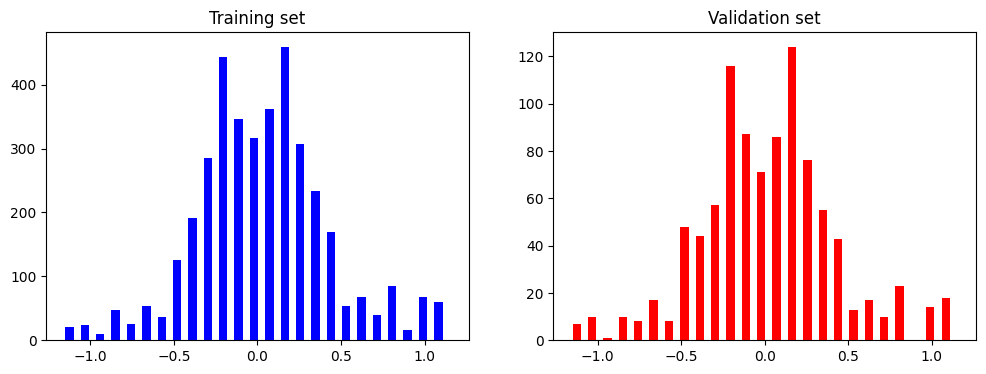

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [13]:
def image_preprocess(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

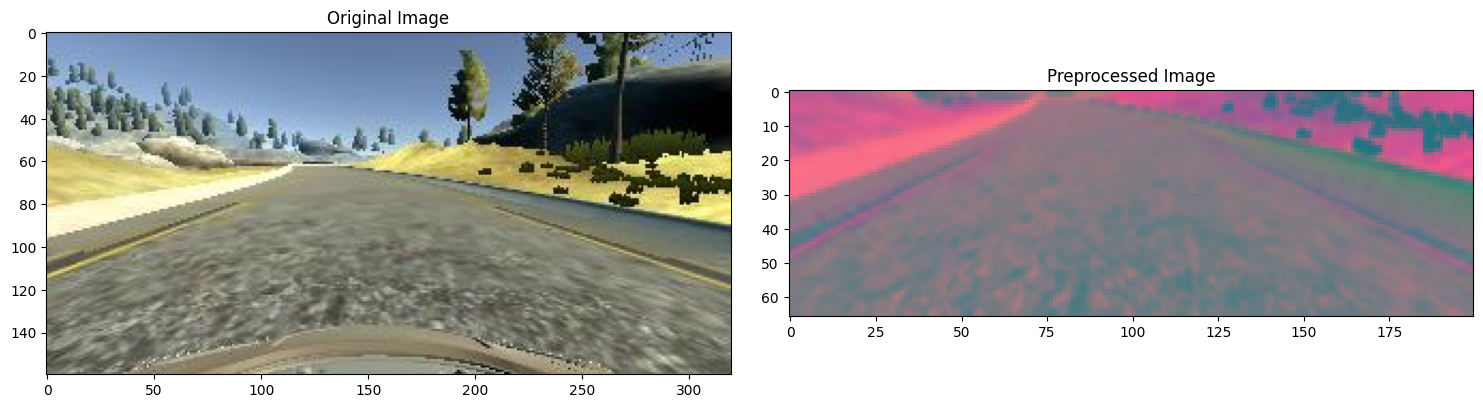

In [14]:
image = image_paths[150]
original_image = mpimg.imread(image)
preprocessing_image = image_preprocess(image)

fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessing_image)
axs[1].set_title('Preprocessed Image')

In [15]:
X_train = np.array(list(map(image_preprocess, X_train)))
X_valid = np.array(list(map(image_preprocess, X_valid)))

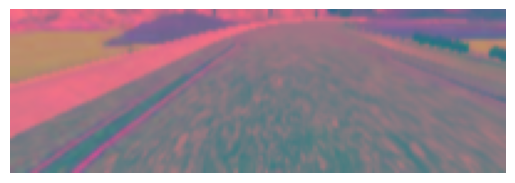

(3849, 66, 200, 3)


In [16]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
plt.show()
print(X_train.shape)

In [17]:
def nvidia_model():

  model = Sequential()

  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))

  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Dropout(0.5))


  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))


  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation ='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))


  optimizer= Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)

  return model

In [18]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [19]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30
39/39 [==============================] - 29s 700ms/step - loss: 0.4367 - val_loss: 0.1529
Epoch 2/30
39/39 [==============================] - 27s 689ms/step - loss: 0.1698 - val_loss: 0.1312
Epoch 3/30
39/39 [==============================] - 37s 968ms/step - loss: 0.1476 - val_loss: 0.1123
Epoch 4/30
39/39 [==============================] - 31s 793ms/step - loss: 0.1377 - val_loss: 0.0944
Epoch 5/30
39/39 [==============================] - 27s 690ms/step - loss: 0.1226 - val_loss: 0.0818
Epoch 6/30
39/39 [==============================] - 27s 682ms/step - loss: 0.1114 - val_loss: 0.0760
Epoch 7/30
39/39 [==============================] - 27s 688ms/step - loss: 0.1035 - val_loss: 0.0723
Epoch 8/30
39/39 [==============================] - 26s 679ms/step - loss: 0.1035 - val_loss: 0.0664
Epoch 9/30
39/39 [==============================] - 28s 721ms/step - loss: 0.0967 - val_loss: 0.0628
Epoch 10/30
39/39 [==============================] - 26s 680ms/step - loss: 0.0896 - val_lo

Text(0.5, 0, 'Epoch')

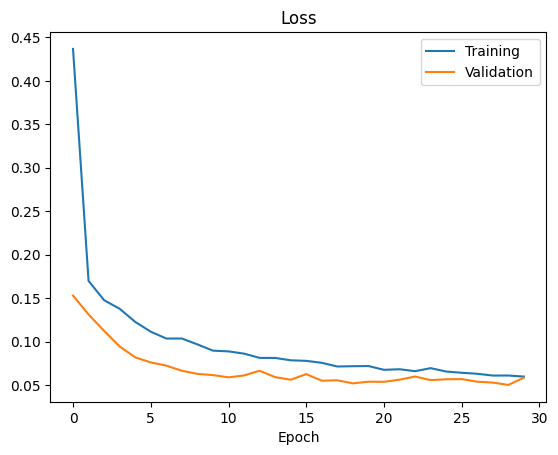

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [21]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>